# Sectoral shifts

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [936]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read and clean data

Import your data, either through an API or manually, and load it. 

In [937]:
import os 

# Using assert to check that paths exist on computer.
assert os.path.isdir('Data/')
assert os.path.isfile('Data/virksomheder.xlsx')

# Print everything in data
os.listdir('Data/')

['virksomheder.xlsx']

In [938]:
filename = 'Data/virksomheder.xlsx' # open the file and have a look at it
pd.read_excel(filename).head(5)

,"General business statistics by municipality group, industry (DB07 10-group) and time",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Unit: Number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0
2,All Denmark,"Industry, raw material extraction and utility ...",20155.0,20312.0,20228.0,19667.0,19584.0,19341.0,19610.0,19698.0,19747.0,19840.0,19629.0,19636.0
3,NaN,Construction and civil engineering,31588.0,31575.0,31300.0,30707.0,31280.0,31197.0,31973.0,32643.0,33306.0,33937.0,34756.0,35949.0
4,NaN,Trade and transport etc.,71035.0,70428.0,69508.0,67656.0,66781.0,65635.0,66816.0,67559.0,67121.0,67149.0,66412.0,67232.0


In [939]:
firm = pd.read_excel(filename, skiprows=2)
firm.head(5)

,Unnamed: 0,Unnamed: 1,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,All Denmark,"Industry, raw material extraction and utility ...",20155,20312,20228,19667,19584,19341,19610,19698,19747,19840,19629,19636
1,NaN,Construction and civil engineering,31588,31575,31300,30707,31280,31197,31973,32643,33306,33937,34756,35949
2,NaN,Trade and transport etc.,71035,70428,69508,67656,66781,65635,66816,67559,67121,67149,66412,67232
3,NaN,Information and communication,13597,14588,14962,15409,16109,16109,17130,17992,18492,18970,19003,19448
4,NaN,Real estate trading and renting,24664,27220,27398,27574,27464,26935,28448,29216,29654,29644,30296,30935


In [940]:
# Drop the first column by using its index position
firm = firm.iloc[:, 1:]

# Display the first five rows to verify the changes
firm.head(5)

,Unnamed: 1,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"Industry, raw material extraction and utility ...",20155,20312,20228,19667,19584,19341,19610,19698,19747,19840,19629,19636
1,Construction and civil engineering,31588,31575,31300,30707,31280,31197,31973,32643,33306,33937,34756,35949
2,Trade and transport etc.,71035,70428,69508,67656,66781,65635,66816,67559,67121,67149,66412,67232
3,Information and communication,13597,14588,14962,15409,16109,16109,17130,17992,18492,18970,19003,19448
4,Real estate trading and renting,24664,27220,27398,27574,27464,26935,28448,29216,29654,29644,30296,30935


In [941]:
firm.rename(columns = {'Unnamed: 1':'Sector'}, inplace=True)
firm.head(5)

,Sector,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"Industry, raw material extraction and utility ...",20155,20312,20228,19667,19584,19341,19610,19698,19747,19840,19629,19636
1,Construction and civil engineering,31588,31575,31300,30707,31280,31197,31973,32643,33306,33937,34756,35949
2,Trade and transport etc.,71035,70428,69508,67656,66781,65635,66816,67559,67121,67149,66412,67232
3,Information and communication,13597,14588,14962,15409,16109,16109,17130,17992,18492,18970,19003,19448
4,Real estate trading and renting,24664,27220,27398,27574,27464,26935,28448,29216,29654,29644,30296,30935


In [942]:
col_dict = {}
for i in range(2010, 2021+1): 
    col_dict[str(i)] = f'firm{i}'

col_dict = {str(i) : f'firm{i}' for i in range(2010,2021+1)}
col_dict

{'2010': 'firm2010',
 '2011': 'firm2011',
 '2012': 'firm2012',
 '2013': 'firm2013',
 '2014': 'firm2014',
 '2015': 'firm2015',
 '2016': 'firm2016',
 '2017': 'firm2017',
 '2018': 'firm2018',
 '2019': 'firm2019',
 '2020': 'firm2020',
 '2021': 'firm2021'}

In [943]:
firm.rename(columns = col_dict, inplace=True)
firm.head(10)

,Sector,firm2010,firm2011,firm2012,firm2013,firm2014,firm2015,firm2016,firm2017,firm2018,firm2019,firm2020,firm2021
0,"Industry, raw material extraction and utility ...",20155,20312,20228,19667,19584,19341,19610,19698,19747,19840,19629,19636
1,Construction and civil engineering,31588,31575,31300,30707,31280,31197,31973,32643,33306,33937,34756,35949
2,Trade and transport etc.,71035,70428,69508,67656,66781,65635,66816,67559,67121,67149,66412,67232
3,Information and communication,13597,14588,14962,15409,16109,16109,17130,17992,18492,18970,19003,19448
4,Real estate trading and renting,24664,27220,27398,27574,27464,26935,28448,29216,29654,29644,30296,30935
5,Business service,45520,47637,48347,48810,50021,50038,53054,54721,55923,57584,57904,59768


In [944]:
firm.describe()

,firm2010,firm2011,firm2012,firm2013,firm2014,firm2015,firm2016,firm2017,firm2018,firm2019,firm2020,firm2021
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,34426.500000,35293.333333,35290.500000,34970.500000,35206.500000,34875.833333,36171.833333,36971.500000,37373.833333,37854.000000,38000.000000,38828.000000
std,20995.977165,20586.242004,20296.068405,19746.436182,19496.457019,19215.271847,19688.809232,19940.505618,19861.205839,20056.552874,19857.823456,20296.680369
min,13597.000000,14588.000000,14962.000000,15409.000000,16109.000000,16109.000000,17130.000000,17992.000000,18492.000000,18970.000000,19003.000000,19448.000000
25%,21282.250000,22039.000000,22020.500000,21643.750000,21554.000000,21239.500000,21819.500000,22077.500000,22223.750000,22291.000000,22295.750000,22460.750000
50%,28126.000000,29397.500000,29349.000000,29140.500000,29372.000000,29066.000000,30210.500000,30929.500000,31480.000000,31790.500000,32526.000000,33442.000000
75%,42037.000000,43621.500000,44085.250000,44284.250000,45335.750000,45327.750000,47783.750000,49201.500000,50268.750000,51672.250000,52117.000000,53813.250000
max,71035.000000,70428.000000,69508.000000,67656.000000,66781.000000,65635.000000,66816.000000,67559.000000,67121.000000,67149.000000,66412.000000,67232.000000


In [945]:
firm.iloc[:,1:].mean()

firm2010    34426.500000
firm2011    35293.333333
firm2012    35290.500000
firm2013    34970.500000
firm2014    35206.500000
firm2015    34875.833333
firm2016    36171.833333
firm2017    36971.500000
firm2018    37373.833333
firm2019    37854.000000
firm2020    38000.000000
firm2021    38828.000000
dtype: float64

## Explore the data

In this section, we will visually present the data using various methods.

We will now illustrate the development of each sector over time. This will enable us to gain insight into the various trends and compare the different industries.

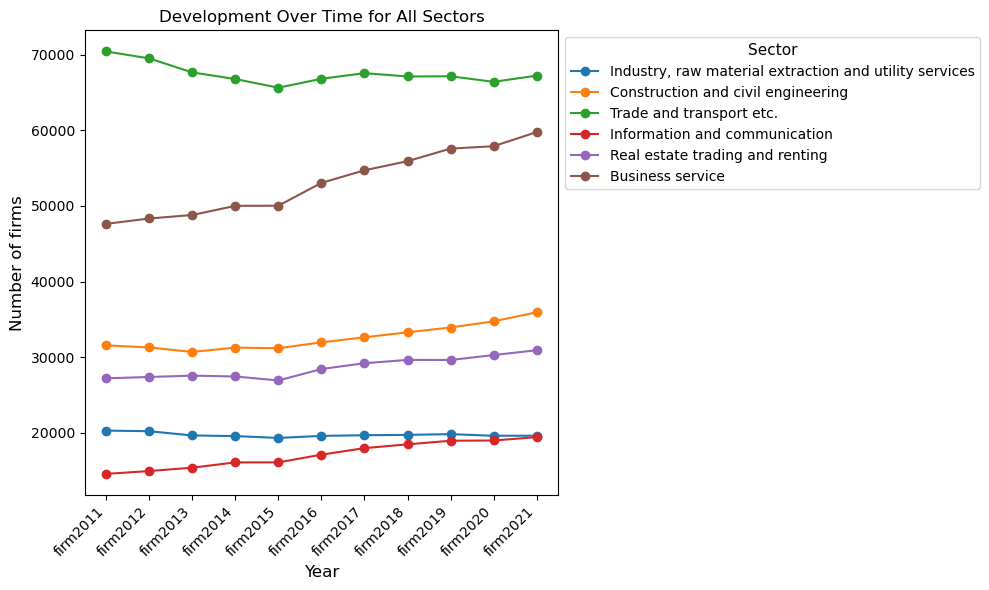

In [946]:
plt.figure(figsize=(10, 6)) 

#We will plot each sector's data
for sector_index in range(len(firm)):
    sector_data = firm.iloc[sector_index, 2:] 
    sector_name = firm.iloc[sector_index, 0] 
    plt.plot(sector_data.index, sector_data.values, label=sector_name, marker='o')

plt.title('Development Over Time for All Sectors', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of firms', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.legend(title='Sector', title_fontsize='11', fontsize='10', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout() 
plt.show()


Below, we present the development of two individual sectors over time. We have focused on 'Industry, raw material extraction and utility' and 'Business service' due to their particularly interesting growth trajectories. 

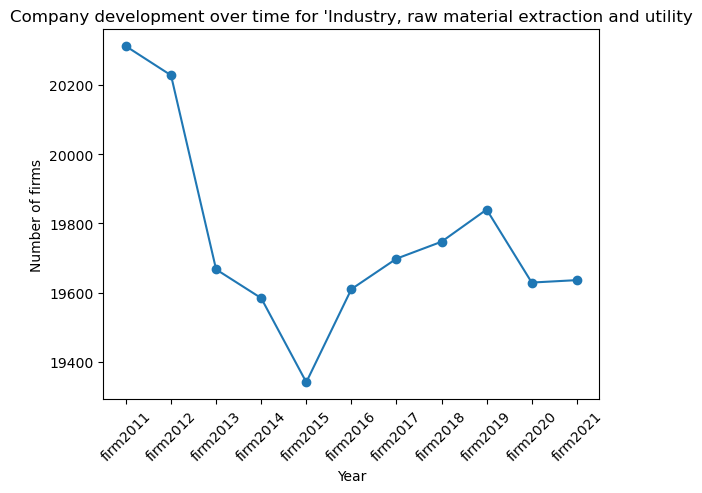

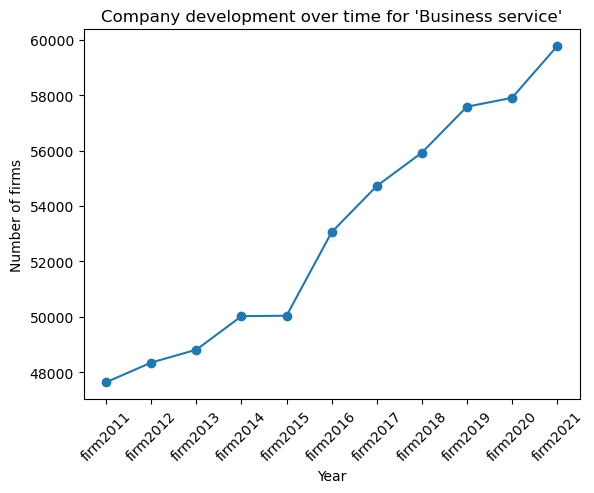

In [947]:
#First, we plot the development of the number of companies within 'Industry, raw material extraction and utility'
firm_index = 0 
firm_data = firm.iloc[firm_index, 2:] 
plt.plot(firm_data.index, firm_data.values, marker='o')
plt.title("Company development over time for 'Industry, raw material extraction and utility")
plt.xlabel('Year')
plt.ylabel('Number of firms')
plt.xticks(rotation=45) 
plt.show()

#Next, we will illustrate the trend in the number of firms in the 'Business service' sector.
firm_index = 5 
firm_data = firm.iloc[firm_index, 2:]  
plt.plot(firm_data.index, firm_data.values, marker='o')
plt.title(f"Company development over time for 'Business service'")
plt.xlabel('Year')
plt.ylabel('Number of firms')
plt.xticks(rotation=45)  
plt.show()

We observe that the 'Industry, raw material extraction and utility' sector has experienced significant fluctuations and a general downward trend over several years. In contrast, the 'Business service' sector has shown substantial growth in the number of companies from 2011 to 2021

We will now construct a stacked bar chart to depict the number of companies within each sector, facilitating a comparison across different industries.

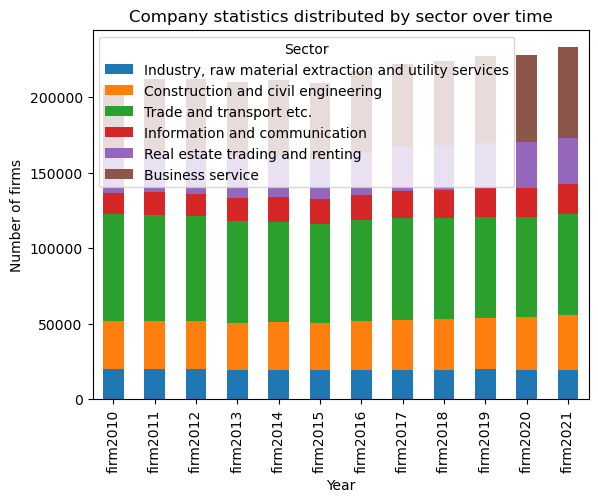

In [948]:
firm.set_index('Sector', inplace=True)
firm.T.plot(kind='bar', stacked=True)  
plt.title("Company statistics distributed by sector over time")
plt.xlabel('Year')
plt.ylabel('Number of firms')
plt.legend(title='Sector')
plt.show()

# Analysis

In this section, we will calculate the annual growth rates for each sector to determine which sectors are expanding most rapidly. This analysis will offer insights into the economic dynamics and indicate which sectors are the most robust drivers of growth.

In [949]:
#First, we enter our data manually to circumvent any error messages.
data = {
    'Sector': [
        'Industry, raw material extraction and utility', 
        'Construction and civil engineering', 
        'Trade and transport etc.', 
        'Information and communication', 
        'Real estate trading and renting', 
        'Business service'
    ],
    'firm2010': [20155, 31858, 71035, 13597, 24664, 45520],
    'firm2011': [20312, 31575, 70428, 14588, 27220, 47637],
    'firm2012': [20228, 31300, 69508, 14962, 27398, 48347],
    'firm2013': [19667, 30707, 67656, 15409, 27574, 48810],
    'firm2014': [19584, 31280, 66781, 16109, 27464, 50021],
    'firm2015': [19341, 31197, 65635, 16109, 26935, 50038],
    'firm2016': [19610, 31973, 66816, 17130, 28448, 53054],
    'firm2017': [19698, 32643, 67559, 17992, 29216, 54721],
    'firm2018': [19747, 33306, 67121, 18492, 29644, 55923],
    'firm2019': [19840, 33937, 67149, 18970, 30296, 57584],
    'firm2020': [19629, 34756, 66412, 19003, 30296, 57904],
    'firm2021': [19636, 35949, 67232, 19448, 30935, 59768]
}

#Now, we will create a DataFrame.
df = pd.DataFrame(data)

#We compute the annual growth rates for each sector.
growth_rates = pd.DataFrame(index=df.index)
for i in range(2010, 2021):
    year_column = f'firm{i}'
    next_year_column = f'firm{i+1}'
    if next_year_column in df.columns:
        growth_rates[next_year_column] = (df[next_year_column] / df[year_column]) - 1

#We calculate the growth rates in percentage terms.
growth_rates *= 100  
#We add the sector names to the growth rates.
growth_rates['Sector'] = df['Sector']  

#Finally, we display the calculated growth rates.
growth_rates


,firm2011,firm2012,firm2013,firm2014,firm2015,firm2016,firm2017,firm2018,firm2019,firm2020,firm2021,Sector
0,0.778963,-0.413549,-2.773383,-0.422027,-1.240809,1.390828,0.448751,0.248756,0.470958,-1.063508,0.035662,"Industry, raw material extraction and utility"
1,-0.888317,-0.870942,-1.894569,1.866024,-0.265345,2.487419,2.095518,2.031063,1.894554,2.413295,3.432501,Construction and civil engineering
2,-0.854508,-1.306299,-2.664442,-1.293307,-1.716057,1.799345,1.112009,-0.648322,0.041716,-1.097559,1.234717,Trade and transport etc.
3,7.288372,2.563751,2.987569,4.542800,0.000000,6.338072,5.032107,2.779013,2.584902,0.173959,2.341736,Information and communication
4,10.363283,0.653931,0.642383,-0.398927,-1.926158,5.617227,2.699663,1.464951,2.199433,0.000000,2.109189,Real estate trading and renting
5,4.650703,1.490438,0.957660,2.481049,0.033986,6.027419,3.142082,2.196597,2.970155,0.555710,3.219121,Business service


# Conclusion

Our analysis of sectoral growth from 2010 to 2021 provides valuable insights into the evolving dynamics of different economic areas. Notably, the Information and Communication sector has shown remarkable growth, expanding from 13597 firms in 2010 to 19448 in 2021. This represents an average annual growth rate of approximately 3.5%, highlighting the sector's robust response to the increasing demand for digital and communication services.

Conversely, the Industry sector has experienced a slight decline, with the number of firms decreasing from 20155 to 19636 over the same period. This trend suggests challenges such as global competition or shifts in technology that may be impacting traditional manufacturing and industrial sectors.

The Construction and Civil Engineering sector, however, has demonstrated significant resilience and growth, particularly evident after 2016. The number of firms in this sector increased from 31973 to 35949 by 2021. Similarly, the Business Service sector has witnessed substantial growth, with an increase from 45520 firms in 2010 to 59768 in 2021. 

These patterns highlight a vibrant and shifting economic landscape. Some sectors are experiencing strong growth, while others face challenges. Strategies to embrace technological advancements and innovate within traditional industries could be key to maintaining a balanced and thriving economic environment.